# Lab | Handling Data Imbalance in Classification Models

For this lab and in the next lessons we will build a model on customer churn binary classification problem. You will be using files_for_lab/Customer-Churn.csv file.

**Scenario**
You are working as an analyst with this internet service provider. You are provided with this historical data about your company's customers and their churn trends. Your task is to build a machine learning model that will help the company identify customers that are more likely to default/churn and thus prevent losses from such customers.

**Instructions**
In this lab, we will first take a look at the degree of imbalance in the data and correct it using the techniques we learned on the class.

Here is the list of steps to be followed (building a simple model without balancing the data):

## Import the required libraries and modules that you would need.

In [67]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm
from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from imblearn.over_sampling import SMOTE

## Read that data into Python and call the dataframe churnData.

In [12]:
churnData = pd.read_csv(r'files_for_lab\Customer-Churn.csv',encoding='latin-1')

In [13]:
churnData.shape

(7043, 16)

In [14]:
churnData.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,Yes,No,No,No,No,Month-to-month,29.85,29.85,No
1,Male,0,No,No,34,Yes,Yes,No,Yes,No,No,No,One year,56.95,1889.5,No
2,Male,0,No,No,2,Yes,Yes,Yes,No,No,No,No,Month-to-month,53.85,108.15,Yes
3,Male,0,No,No,45,No,Yes,No,Yes,Yes,No,No,One year,42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,No,No,No,No,No,Month-to-month,70.70,151.65,Yes


## Check the datatypes of all the columns in the data. You would see that the column TotalCharges is object type. Convert this column into numeric type using pd.to_numeric function.

In [16]:
churnData.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [25]:
churnData['TotalCharges'] = pd.to_numeric(churnData['TotalCharges'], errors='coerce')

In [26]:
churnData.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

## Check for null values in the dataframe. Replace the null values.

In [28]:
churnData.isna().any()

gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
MonthlyCharges      False
TotalCharges         True
Churn               False
dtype: bool

In [29]:
percent_missing = churnData.isnull().sum() * 100 / len(churnData)

In [32]:
print(round(percent_missing,2))

gender              0.00
SeniorCitizen       0.00
Partner             0.00
Dependents          0.00
tenure              0.00
PhoneService        0.00
OnlineSecurity      0.00
OnlineBackup        0.00
DeviceProtection    0.00
TechSupport         0.00
StreamingTV         0.00
StreamingMovies     0.00
Contract            0.00
MonthlyCharges      0.00
TotalCharges        0.16
Churn               0.00
dtype: float64


due to low amount of missing values I will drop the null rows

In [35]:
churnData = churnData.dropna()

In [36]:
churnData.shape

(7032, 16)

11 rows have been dropped

In [37]:
churnData.isna().any()

gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
MonthlyCharges      False
TotalCharges        False
Churn               False
dtype: bool

## Use the following features: tenure, SeniorCitizen, MonthlyCharges and TotalCharges:

### Scale the features either by using normalizer or a standard scaler.

In [49]:
data1 = churnData[['tenure', 'SeniorCitizen', 'MonthlyCharges', 'TotalCharges']].copy()

In [50]:
transformer = StandardScaler().fit(data1)
x_standardized = transformer.transform(data1)
x_standardized

array([[-1.28024804, -0.44032709, -1.16169394, -0.99419409],
       [ 0.06430269, -0.44032709, -0.26087792, -0.17373982],
       [-1.23950408, -0.44032709, -0.36392329, -0.95964911],
       ...,
       [-0.87280842, -0.44032709, -1.17000405, -0.85451414],
       [-1.15801615,  2.27103902,  0.31916782, -0.87209546],
       [ 1.36810945, -0.44032709,  1.35793167,  2.01234407]])

### Split the data into a training set and a test set.

In [51]:
X = data1

In [52]:
y = churnData['Churn']

In [53]:
X = pd.get_dummies(X)
X

,tenure,SeniorCitizen,MonthlyCharges,TotalCharges
0,1,0,29.85,29.85
1,34,0,56.95,1889.50
2,2,0,53.85,108.15
3,45,0,42.30,1840.75
4,2,0,70.70,151.65
...,...,...,...,...
7038,24,0,84.80,1990.50
7039,72,0,103.20,7362.90
7040,11,0,29.60,346.45
7041,4,1,74.40,306.60


In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

 ### Fit a logistic regression model on the training data.

In [55]:
classification = LogisticRegression(random_state=42, max_iter=10000)
classification.fit(X_train, y_train)

LogisticRegression(max_iter=10000, random_state=42)

### Check the accuracy on the test data.

In [56]:
classification.score(X_test, y_test)

0.7803837953091685

In [57]:
predictions = classification.predict(X_test)
confusion_matrix(y_test, predictions)

array([[935,  98],
       [211, 163]], dtype=int64)

<AxesSubplot:>

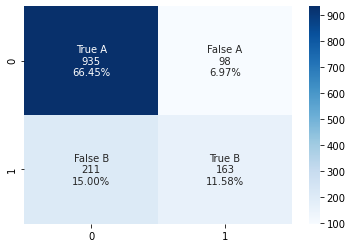

In [59]:
cf_matrix = confusion_matrix(y_test, predictions)
group_names = ['True A', 'False A',
               'False B', 'True B']

group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

## Note: So far we have not balanced the data. - Managing imbalance in the dataset

### Check for the imbalance.

In [66]:
for i in data1:
    print(data1[i].value_counts())

1     613
72    362
2     238
3     200
4     176
     ... 
38     59
28     57
39     56
44     51
36     50
Name: tenure, Length: 72, dtype: int64
0    5890
1    1142
Name: SeniorCitizen, dtype: int64
20.05     61
19.85     44
19.90     44
19.95     44
19.65     43
          ..
92.35      1
35.60      1
72.85      1
67.70      1
113.30     1
Name: MonthlyCharges, Length: 1584, dtype: int64
20.20      11
19.75       9
19.65       8
20.05       8
19.90       8
           ..
1066.15     1
249.95      1
8333.95     1
7171.70     1
1024.00     1
Name: TotalCharges, Length: 6530, dtype: int64


### Use the resampling strategies used in class for upsampling and downsampling to create a balance between the two classes.

In [68]:
# SMOTE

smote = SMOTE()

X_sm, y_sm = smote.fit_resample(X, y)
y_sm.value_counts()

Yes    5163
No     5163
Name: Churn, dtype: int64

### Each time fit the model and see how the accuracy of the model is.

<AxesSubplot:>

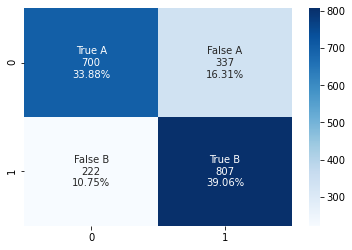

In [70]:
#SMOTE
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=42)

 ### Fit a logistic regression model on the training data.

classification = LogisticRegression(random_state=42, max_iter=10000)
classification.fit(X_train, y_train)

### Check the accuracy on the test data.

classification.score(X_test, y_test)

predictions = classification.predict(X_test)
confusion_matrix(y_test, predictions)

cf_matrix = confusion_matrix(y_test, predictions)
group_names = ['True A', 'False A',
               'False B', 'True B']

group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

why does the quality of my model decrease using SMOTE? I guess I applied it incorrectly?